In [1]:
import numpy as np, scipy, matplotlib.pyplot as plt, scipy.integrate
from scipy.interpolate import interp1d
plt.style.use(('presentation'))

### Problem 1

**Part (c)**

We also solve the equations of motion numerically for the same set of parameter values.

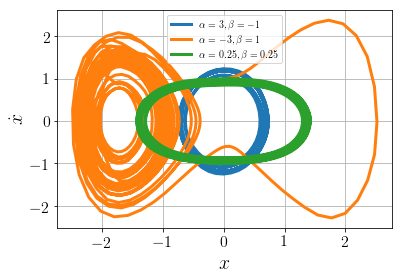

In [9]:
params = [[3,-1],[-3,1],[0.25,0.25]]
for alpha, beta in params:
    def f(t,y):
        x = y[0]
        xd = y[1]
        return np.array([xd, -alpha*x - beta*x**3])
    ini = [0,1]
    sol = scipy.integrate.solve_ivp(f,[0,100],[ini[0],ini[1]],
                                        t_eval=np.linspace(0,100,1000),atol=1e-2,rtol=1e-2)
    plt.plot(sol.y[0],sol.y[1],label=r'$\alpha = %s, \beta = %s$'%(alpha,beta))
plt.xlabel('$x$')
plt.ylabel('$\dot{x}$')
plt.legend()
plt.show()

One can see the artifacts of numerical integration in the plots. These can easily be avoided by taking a lower absolute and relative tolerance in the solver.

**Part (e)** - When $\delta \ne 0$, there is dissipation in the system, and hence the phase space plots will differ. We now solve the resultant equation of motion $m \ddot{x} + \delta \dot{x} + \alpha x + \beta x^3 = 0$ numerically (taking $m=1)$.

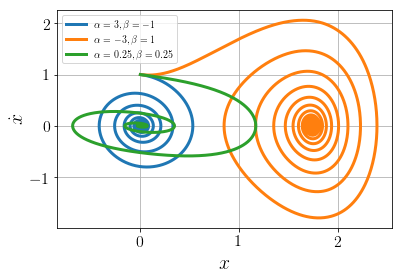

In [5]:
params =  [[3,-1,0.25],[-3,1,0.25],[0.25,0.25,0.25]]
for alpha, beta, delta in params:
    def f(t,y):
        x = y[0]
        xd = y[1]
        return np.array([xd, -delta*xd -alpha*x - beta*x**3])
    ini = [0,1]
    sol = scipy.integrate.solve_ivp(f,[0,100],[ini[0],ini[1]],
                                        t_eval=np.linspace(0,50,10000))
    plt.plot(sol.y[0],sol.y[1],label=r'$\alpha = %s, \beta = %s$'%(alpha,beta))
plt.xlabel('$x$')
plt.ylabel('$\dot{x}$')
plt.legend()
plt.show()

**Part(h)** - Poincare Plot

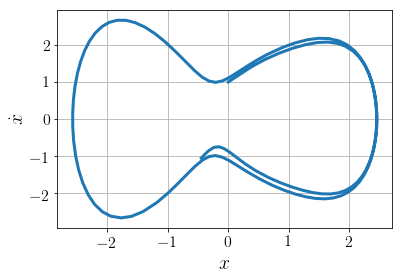

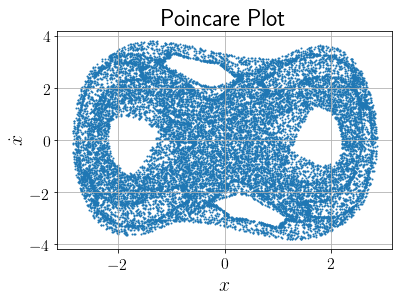

In [12]:
params = [[-3,1]]
for alpha, beta in params:
    def f(t,y):
        x = y[0]
        xd = y[1]
        return np.array([xd, -alpha*x - beta*x**3 + np.cos(4*t)])
    ini = [0,1]
    sol = scipy.integrate.solve_ivp(f,[0,15000],[ini[0],ini[1]],rtol=1e-7,atol=1e-7)
    #plt.plot(sol.y[0],sol.y[1])
    q_arr = sol.y[0]
    qdot_arr = sol.y[1]
    time = sol.t
    q = interp1d(time,q_arr)
    qdot = interp1d(time,qdot_arr)
    tm = np.arange(1,15000,2*np.pi/8.)
    tm_1 = np.linspace(0,10,10000)
    plt.plot(q(tm_1),qdot(tm_1))
    plt.xlabel('$x$')
    plt.ylabel('$\dot{x}$')
    
    plt.figure()
    plt.scatter(q(tm),qdot(tm),s=1)
    plt.xlabel('$x$')
    plt.ylabel('$\dot{x}$')
    plt.title('Poincare Plot')
plt.show()